## Data Exploration

In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pandasql import sqldf
import seaborn as sns
from numpy import random
import random

#set-up to be able to run sql queries in Jupyter Notebook
mysql = lambda q: sqldf(q, globals())

In [2]:
main = os.listdir("./wikiart/")

genres = []
for genre in main:
    if genre[0] != ".":
        genres.append(genre)

data = sorted(genres)

In [15]:
poc_list = ["Realism", "Impressionism"]

In [16]:
from PIL import Image
import glob, os

paintings_list = []
size = 128, 128

for index, genre in enumerate(poc_list):
    print(f"the genre is {genre}")
    g = os.listdir("./wikiart/" + str(genre))
    
    for i, painting in enumerate(g):
        with Image.open("./wikiart/" + genre + "/" +painting) as im:
            img_resized = im.resize(size)
            image_array = np.array(img_resized)
            #print(image_array.shape)
            #paintings_list.append(image_array)
            string = g[i][:-4]
            string = string.replace("-"," ")
            string = string.split("_")
            string.insert(0, genre)
            string.append(image_array)
            paintings_list.append(string)
    
            if i % 100 == 0:
                print(i+1)

the genre is Realism
1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901
3001
3101
3201
3301
3401
3501
3601
3701
3801
3901
4001
4101
4201
4301
4401
4501
4601
4701
4801
4901
5001
5101
5201
5301
5401
5501
5601
5701
5801
5901
6001
6101
6201
6301
6401
6501
6601
6701
6801
6901
7001
7101
7201
7301
7401
7501
7601
7701
7801
7901
8001
8101
8201
8301
8401
8501
8601
8701
8801
8901
9001
9101
9201
9301
9401
9501
9601
9701
9801
9901
10001
10101
10201
10301
10401
10501
10601
10701
the genre is Impressionism
1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901
2001
2101
2201
2301
2401
2501
2601
2701
2801
2901
3001
3101
3201
3301
3401
3501
3601
3701
3801
3901
4001
4101
4201
4301
4401
4501
4601
4701
4801
4901
5001
5101
5201
5301
5401
5501
5601
5701
5801
5901
6001
6101
6201
6301
6401
6501
6601
6701
6801
6901
7001
7101
7201
7301
7401
7501
7601
7701
7801
7901
8001
8101
8201
8301
8401
850

In [27]:
df = pd.DataFrame(paintings_list)
df = df.drop(columns = [4,5])
df = df.rename(columns = {0:'genre', 1:'artist', 2:'title', 3:'image'})
df

,genre,artist,title,image
0,Realism,abraham manievich,flowers vase on a hamper,"[[[141, 147, 126], [142, 150, 123], [147, 157,..."
1,Realism,adolf hitler,alter werderthor wien,"[[[169, 136, 105], [167, 134, 103], [164, 131,..."
2,Realism,adolf hitler,castle battlements,"[[[186, 182, 157], [186, 182, 157], [184, 179,..."
3,Realism,adolf hitler,flower blossom study,"[[[232, 221, 209], [236, 225, 213], [236, 226,..."
4,Realism,adolf hitler,flowers with roots,"[[[220, 213, 203], [202, 195, 185], [209, 200,..."
...,...,...,...,...
23788,Impressionism,zinaida serebriakova,veranda spring,"[[[193, 195, 191], [196, 186, 178], [192, 182,..."
23789,Impressionism,zinaida serebriakova,window 1910,"[[[92, 76, 77], [97, 81, 82], [93, 77, 80], [9..."
23790,Impressionism,zinaida serebriakova,winter in the royal village upper bath 1912,"[[[205, 193, 179], [203, 191, 177], [199, 187,..."
23791,Impressionism,zinaida serebriakova,winter landscape neskuchnoye 1910,"[[[192, 178, 152], [192, 180, 156], [193, 183,..."


In [28]:
df['genre'].value_counts()

Impressionism    13060
Realism          10733
Name: genre, dtype: int64

In [20]:
impressionism = random.sample(range(10733, 23793), 3060)
realism = random.sample(range(0, 10733), 733)

In [30]:
for i in impressionism:
    df = df.drop(index = i)
    
for i in realism:
    df = df.drop(index = i)

In [32]:
df = df.reset_index(drop=True)

In [33]:
df

,genre,artist,title,image
0,Realism,abraham manievich,flowers vase on a hamper,"[[[141, 147, 126], [142, 150, 123], [147, 157,..."
1,Realism,adolf hitler,alter werderthor wien,"[[[169, 136, 105], [167, 134, 103], [164, 131,..."
2,Realism,adolf hitler,castle battlements,"[[[186, 182, 157], [186, 182, 157], [184, 179,..."
3,Realism,adolf hitler,flowers with roots,"[[[220, 213, 203], [202, 195, 185], [209, 200,..."
4,Realism,adolf hitler,informal dining room long view,"[[[153, 116, 89], [160, 129, 128], [175, 158, ..."
...,...,...,...,...
19995,Impressionism,zinaida serebriakova,veranda spring,"[[[193, 195, 191], [196, 186, 178], [192, 182,..."
19996,Impressionism,zinaida serebriakova,window 1910,"[[[92, 76, 77], [97, 81, 82], [93, 77, 80], [9..."
19997,Impressionism,zinaida serebriakova,winter in the royal village upper bath 1912,"[[[205, 193, 179], [203, 191, 177], [199, 187,..."
19998,Impressionism,zinaida serebriakova,winter landscape neskuchnoye 1910,"[[[192, 178, 152], [192, 180, 156], [193, 183,..."


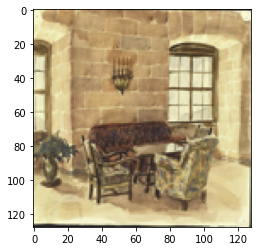

In [42]:
plt.imshow(df['image'][7])

In [31]:
df['genre'].value_counts()

Realism          10000
Impressionism    10000
Name: genre, dtype: int64

In [43]:
df.to_csv("binary_train_20k.csv")

In [44]:
!ls

binary_train_20k.csv	data_info.csv		Untitled.ipynb
data			printsize.ipynb		weebart.csv
data_exploration.ipynb	proof_of_concept.ipynb	wikiart


In [ ]:
count = mysql("""SELECT df.genre,
        COUNT(df.genre) AS genre_count
        FROM df 
        GROUP BY df.genre
        ORDER BY genre_count""")

In [14]:
plt.figure(figsize=(12,6))
plt.bar(count['genre'],count['genre_count'])
plt.xticks(count['genre'], rotation=90);

NameError: name 'count' is not defined

<Figure size 864x432 with 0 Axes>

In [ ]:
artist_count = mysql("""SELECT df.artist,
        COUNT(df.artist) AS artist_count
        FROM df 
        GROUP BY df.artist
        ORDER BY artist_count DESC
        LIMIT 10""")

In [ ]:
len(df['artist'].unique())